In [ ]:
import torch
import catdog
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F


def predict_image(model, path):
    model.eval()
    with torch.no_grad():
        classes = catdog.Classes()
        img = Image.open(path)
        processed_image = catdog.Transform()(img)
        processed_image = processed_image.unsqueeze(0)

        output = model(processed_image)
        probs = F.softmax(output, dim=1)
        _, predicted = torch.max(output, 1)

        plt.imshow(img)
        plt.xlabel(
            f"Predicted: {classes[predicted.item()]} ({100*float(probs[0][predicted]):.2f}%)"
        )

In [9]:
model = torch.load('./cat_dog.pth', weights_only=False)

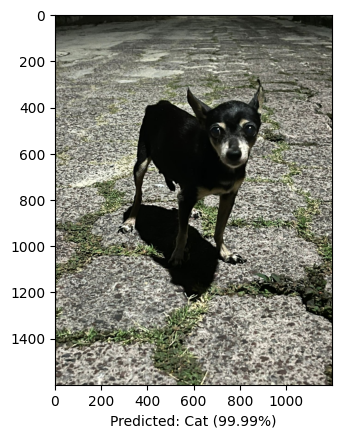

In [ ]:
predict_image(model, '../test_images/chuchain.jpg')